<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Segment customers of a website - P5</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">| Modeling notebook |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [1]:
## General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from statsmodels.graphics.gofplots import qqplot

## df_analysis
import io
import gc
import timeit
import math
from math import pi
from collections import Counter
from math import prod
import scipy.stats as stats

## Scikit Learn 
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

## Yellowbrick - Scikit Learn 
from yellowbrick.cluster import KElbowVisualizer

# Own specific functions 
from functions import *

%matplotlib inline
sns.set_theme(style="darkgrid")

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Functions declaration</h3>
</div>

In [2]:
def df_analysis(df, name_df, *args, **kwargs):
    """
    Method used to analyze on the DataFrame.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        name_df (str): Dataset name
        
        *args, **kwargs:
        -----------------
            columns (list): Dataframe keys in list format
            flag (str): Flag to show complete information about the dataset to analyse
                        "complete" shows all information about the dataset

    Returns:
    -----------------
        None. 
        Print the analysis on the Dataset. 
    """
    
    # Getting the variables
    columns = kwargs.get("columns", None)
    type_analysis = kwargs.get("type_analysis", None)
    
    ORDERING_COMPLETE = [
        "name", "type", "records", "unique", "# NaN", "% NaN", "mean", "min", "25%", "50%", "75%", "max", "std"
    ]
    
    # Calculating the memory usage based on dataframe.info()
    buf = io.StringIO()
    df.info(buf=buf)
    memory_usage = buf.getvalue().split('\n')[-2]
    
    if df.empty:
        print("The", name_df, "dataset is empty. Please verify the file.")
    else:
        empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
        df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
        # Creating a dataset based on Type object and records by columns
        type_cols = df.dtypes.apply(lambda x: x.name).to_dict() 
        df_resume = pd.DataFrame(list(type_cols.items()), columns = ["name", "type"])
        df_resume["records"] = list(df.count())
        df_resume["# NaN"] = list(df.isnull().sum())
        df_resume["% NaN"] = list(((df.isnull().sum() / len(df.index))*100).round(2))
        
        print("\nAnalysis of", name_df, "dataset")
        print("--------------------------------------------------------------------")
        print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
        print("- Total of NaN values:           ", df.isna().sum().sum())
        print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
        print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
        print("- Total of empty rows:           ", df.shape[0] - df.dropna(axis="rows", how="all").shape[0]) if df.dropna(axis="rows", how="all").shape[0] < df.shape[0] else \
                    print("- Total of empty rows:            0")
        print("- Total of empty columns:        ", len(empty_cols))
        print("  + The empty column is:         ", empty_cols) if len(empty_cols) == 1 else \
                    print("  + The empty column are:         ", empty_cols) if len(empty_cols) >= 1 else None
        print("- Unique indexes:                ", df.index.is_unique)
        
        if columns is not None:
            print("\n- The key(s):", columns, "is not present multiple times in the dataframe.\n  It CAN be used as a primary key.") if df.size == df.drop_duplicates(columns).size else \
                print("\n- The key(s):", columns, "is present multiple times in the dataframe.\n  It CANNOT be used as a primary key.")
            
        if type_analysis == "summarized":
            print("\n")
        
        if type_analysis is None or type_analysis != "summarized":
            pd.set_option("display.max_rows", None) # show full of showing rows
            pd.set_option("display.max_columns", None) # show full of showing cols
            pd.set_option("display.max_colwidth", None) # show full width of showing cols
            pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    
            
            if type_analysis is None or type_analysis != "complete":
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
            elif type_analysis == "complete" and (df.select_dtypes(["int64"]).shape[1] > 0 or df.select_dtypes(["float64"]).shape[1] > 0):
                df_resume["unique"] = list(df.nunique())
                df_desc = pd.DataFrame(df.describe().T).reset_index()
                df_desc = df_desc.rename(columns={"index": "name"})
                df_resume = df_resume.merge(right=df_desc[["name", "mean", "min", "25%", "50%", "75%", "max", "std"]], on="name", how="left")
                df_resume = df_resume[ORDERING_COMPLETE]
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
            
            display(df_resume.sort_values("records", ascending=False))
            
            pd.reset_option("display.max_rows") # reset max of showing rows
            pd.reset_option("display.max_columns") # reset max of showing cols
            pd.reset_option("display.max_colwidth") # reset width of showing cols
            pd.reset_option("display.float_format") # reset show full content in cell
            
        # deleting dataframe to free memory
        if type_analysis == "complete":
            
            if df.select_dtypes(["int64"]).shape[1] > 0 or df.select_dtypes(["float64"]).shape[1] > 0:
                del [[df_resume, df_desc]]
            else:
                del [[df_resume]]
            
            gc.collect()
            df_resume, df_desc = (pd.DataFrame() for i in range(2))
        else:
            del df_resume
            gc.collect()
            df_resume = pd.DataFrame()
            
            
def number_of_cluster(df, name_df):
    """
    Method used to calculate the number of cluster through differents metrics

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        
        Metrics:
        -----------------
            WSSE (dict): Within-Cluster-Sum of Squared Errors. Number of cluster by iteration
            davies_bouldin (dict): Davies-Bouldin score. Number of cluster by iteration
            silhouette (dict): The mean Silhouette Coefficient of all samples. Number of cluster by iteration
        
        Returns:
    -----------------
        None. 
        Plot the result. 
    """
    
    WSSE, davies_bouldin, silhouette = ({} for i in range(3))
    
    for i in range(2, 10):
        
        kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0).fit(df)
        
        clusters = kmeans.labels_
        WSSE[i] = kmeans.inertia_ 
        davies_bouldin[i] = davies_bouldin_score(df, clusters)
        silhouette[i] = silhouette_score(df, clusters)
        
    # Plotting the result   
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18, 5))

    fig.suptitle("Number of cluster - " + name_df, size=25, fontweight="bold", y=1.01)

    ax1.plot(list(WSSE.keys()), list(WSSE.values()), color="blue", marker="o")
    ax1.set_title("Within-Cluster-Sum of Squared Errors", fontdict={ "fontsize": 15})
    ax1.set_xlabel("Number of cluster")
    ax1.set_ylabel("WSSE")

    ax2.plot(list(davies_bouldin.keys()), list(davies_bouldin.values()), color="red", marker="o")
    ax2.set_title("Davies-Bouldin score", fontdict={ "fontsize": 15})
    ax2.set_xlabel("Number of cluster")
    ax2.set_ylabel("Davies-Bouldin values")

    ax3.plot(list(silhouette.keys()), list(silhouette.values()), color="gold", marker="o")
    ax3.set_title("Silhouette score", fontdict={ "fontsize": 15})
    ax3.set_xlabel("Number of cluster")
    ax3.set_ylabel("Silhouette score")
    
    plt.tight_layout()
    plt.savefig("Number-of-cluster-" + name_df + ".png", bbox_inches="tight")
    sns.despine(fig)  
    plt.show()

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

<div class="alert alert-block alert-info">
    We are going to load the dateset resulting from the PCA
</div>

In [3]:
df_data = pd.read_csv(r"datasets\data_to_model_refactoring.csv")

In [4]:
df_data.head()

,customer_unique_id,recency,frequency,monetary,satisfaction,rfm_score_label,fashion,furniture,others,electronics,sports_leisure,home,construction,avg_product_weight_g_total,avg_product_volume_cc_total
0,dc4b0942fb780633d44f4f73ff69dd92,6,1,37.46,5.0,New Customers,0.0,0.0,100.0,0.0,0.0,0.0,0.0,163.0,9072.0
1,11ccf36669e0483ac53abfeb566679b6,7,1,67.58,5.0,New Customers,0.0,0.0,100.0,0.0,0.0,0.0,0.0,300.0,2500.0
2,2fc09b16746a702ba0aab85c6a9a7438,11,1,20.38,5.0,New Customers,0.0,0.0,100.0,0.0,0.0,0.0,0.0,250.0,1408.0
3,4ecdb958c2b1b099ed5e56d9ca156773,13,1,292.63,5.0,Promising,0.0,0.0,100.0,0.0,0.0,0.0,0.0,7150.0,36000.0
4,164b46961e3ef442750fed496929369f,13,1,138.95,5.0,Promising,0.0,0.0,100.0,0.0,0.0,0.0,0.0,400.0,3600.0


In [5]:
df_analysis(df_data, "df_data", type_analysis="complete")


Analysis of df_data dataset
--------------------------------------------------------------------
- Dataset shape:                  66934 rows and 15 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 7.7+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,customer_unique_id,object,66934,66934,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,recency,int64,66934,318,0,0.00000,160.54345,0.00000,84.00000,162.00000,235.00000,320.00000,88.82827
2,frequency,int64,66934,9,0,0.00000,1.02564,1.00000,1.00000,1.00000,1.00000,10.00000,0.17772
3,monetary,float64,66934,25504,0,0.00000,147.67983,9.59000,62.91000,107.68500,176.85973,6081.54000,151.14875
4,satisfaction,float64,66934,26,0,0.00000,4.07370,1.00000,4.00000,5.00000,5.00000,5.00000,1.35355
5,rfm_score_label,object,66934,10,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,fashion,float64,66934,393,0,0.00000,24.13891,0.00000,0.00000,0.00000,0.00000,100.00000,42.64764
7,furniture,float64,66934,454,0,0.00000,17.01780,0.00000,0.00000,0.00000,0.00000,100.00000,37.38180
8,others,float64,66934,406,0,0.00000,16.16010,0.00000,0.00000,0.00000,0.00000,100.00000,36.63241
9,electronics,float64,66934,244,0,0.00000,16.63505,0.00000,0.00000,0.00000,0.00000,100.00000,37.14344


<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Dimensionality Reduction</h2>
</div>

<div class="alert alert-block alert-info">
    <p>For the <b>Dimensionality Reduction</b> we are going to work as follow</p>
    <ol>
        <li>Selecting the resulting <b>features of RFM</b> to make the modelisations
            <ul style="list-style-type: disc;">
                <li>recency</li>
                <li>frequency</li>
                <li>monetary</li>
            </ul> 
        </li>
        <li>Making the modelisation with <b>all features</b></li>
    </ol> 
</div>

In [6]:
data_reduced = df_data[["recency", "frequency", "monetary", "satisfaction", "rfm_score_label"]].copy()
data_completed = df_data.drop("customer_unique_id", axis=1).copy()

In [7]:
df_analysis(data_reduced, "data_reduced", type_analysis="complete")


Analysis of data_reduced dataset
--------------------------------------------------------------------
- Dataset shape:                  66934 rows and 5 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  1644
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 2.6+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,recency,int64,66934,318,0,0.00000,160.54345,0.00000,84.00000,162.00000,235.00000,320.00000,88.82827
1,frequency,int64,66934,9,0,0.00000,1.02564,1.00000,1.00000,1.00000,1.00000,10.00000,0.17772
2,monetary,float64,66934,25504,0,0.00000,147.67983,9.59000,62.91000,107.68500,176.85973,6081.54000,151.14875
3,satisfaction,float64,66934,26,0,0.00000,4.07370,1.00000,4.00000,5.00000,5.00000,5.00000,1.35355
4,rfm_score_label,object,66934,10,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_analysis(data_completed, "data_completed", type_analysis="complete")


Analysis of data_completed dataset
--------------------------------------------------------------------
- Dataset shape:                  66934 rows and 14 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  872
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 7.1+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,recency,int64,66934,318,0,0.00000,160.54345,0.00000,84.00000,162.00000,235.00000,320.00000,88.82827
1,frequency,int64,66934,9,0,0.00000,1.02564,1.00000,1.00000,1.00000,1.00000,10.00000,0.17772
2,monetary,float64,66934,25504,0,0.00000,147.67983,9.59000,62.91000,107.68500,176.85973,6081.54000,151.14875
3,satisfaction,float64,66934,26,0,0.00000,4.07370,1.00000,4.00000,5.00000,5.00000,5.00000,1.35355
4,rfm_score_label,object,66934,10,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,fashion,float64,66934,393,0,0.00000,24.13891,0.00000,0.00000,0.00000,0.00000,100.00000,42.64764
6,furniture,float64,66934,454,0,0.00000,17.01780,0.00000,0.00000,0.00000,0.00000,100.00000,37.38180
7,others,float64,66934,406,0,0.00000,16.16010,0.00000,0.00000,0.00000,0.00000,100.00000,36.63241
8,electronics,float64,66934,244,0,0.00000,16.63505,0.00000,0.00000,0.00000,0.00000,100.00000,37.14344
9,sports_leisure,float64,66934,263,0,0.00000,12.68015,0.00000,0.00000,0.00000,0.00000,100.00000,33.14959


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Datapreprocessing</h3>
</div>

<div class="alert alert-block alert-info">
     <p>We are going to process the features as follows</p>
    <p><b>Ordinal features</b><br>
    Transforming the feature through OrdinalEncoder</p>
    <p><b>Numerical features</b><br>
    Normalizing the features through RobustScaler due to all of them do not have a normal distribution and to avoid possibles outliers</p>
</div>

In [9]:
DFs_ORIGINAL = {
    "reduced" : data_reduced,
    "completed" : data_completed    
}

DFs_SCALED = {}

In [10]:
for key, value in DFs_ORIGINAL.items():
    
    NUMERICAL_FEATURES = list(value._get_numeric_data())
    ORDINAL_FEATURES = ["rfm_score_label"]
    
    ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[["Lost customers", "Hibernating customers", 
                                                                 "Cannot Lose Them", "At Risk", "About To Sleep",
                                                                 "Need Attention", "Promising", "New Customers", 
                                                                 "Potential Loyalist", "Loyal", "Champions"]]
                                                   )
                                    )
    
    numerical_pipeline = make_pipeline(QuantileTransformer(random_state=42, output_distribution="uniform"),
                                       StandardScaler()
                                      )

    preprocessor = make_column_transformer(
                (ordinal_pipeline, ORDINAL_FEATURES),
                (numerical_pipeline, NUMERICAL_FEATURES)
    )

    # Droping the real columns and concatenating the encoder columns
    globals()["data_sample_scaled_" + key] = preprocessor.fit_transform(value)
    
    globals()["df_sample_scaled_" + key] = pd.DataFrame(globals()["data_sample_scaled_" + key], index=value.index, columns=value.columns)
    
    DFs_SCALED[key] = globals()["df_sample_scaled_" + key]

In [11]:
for key, value in DFs_SCALED.items():
    print("-- " + key + " " + str(value.shape) + " --")
    display(value.head())
    print("\n")
    

-- reduced (66934, 5) --


,recency,frequency,monetary,satisfaction,rfm_score_label
0,7.0,-1.728655,-0.155435,-1.445912,0.843479
1,7.0,-1.725188,-0.155435,-0.741443,0.843479
2,7.0,-1.702648,-0.155435,-1.714003,0.843479
3,6.0,-1.678374,-0.155435,1.394246,0.843479
4,6.0,-1.678374,-0.155435,0.452680,0.843479




-- completed (66934, 14) --


,recency,frequency,monetary,satisfaction,rfm_score_label,fashion,furniture,others,electronics,sports_leisure,home,construction,avg_product_weight_g_total,avg_product_volume_cc_total
0,7.0,-1.728655,-0.155435,-1.445912,0.843479,-0.568032,-0.457839,2.266528,-0.449826,-0.384293,-0.288671,-0.253556,-1.358231,0.433670
1,7.0,-1.725188,-0.155435,-0.741443,0.843479,-0.568032,-0.457839,2.266528,-0.449826,-0.384293,-0.288671,-0.253556,-0.801475,-0.992988
2,7.0,-1.702648,-0.155435,-1.714003,0.843479,-0.568032,-0.457839,2.266528,-0.449826,-0.384293,-0.288671,-0.253556,-0.983591,-1.357686
3,6.0,-1.678374,-0.155435,1.394246,0.843479,-0.568032,-0.457839,2.266528,-0.449826,-0.384293,-0.288671,-0.253556,1.501865,1.430437
4,6.0,-1.678374,-0.155435,0.452680,0.843479,-0.568032,-0.457839,2.266528,-0.449826,-0.384293,-0.288671,-0.253556,-0.475400,-0.554887


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Principal component analysis - PCA</h3>
</div>

In [12]:
DFs_REDUCED, DFs_PCA = [{} for i in range(2)]

In [13]:
n_comp_reduced, n_comp_completed = 4, 10

for key, value in DFs_SCALED.items():
    
    # Selecting the features to analyse with PCA and 
    # be able to transform to Dataset after making the PCA
    globals()["X_" + key] = globals()["df_sample_scaled_" + key].values
    globals()["index_values_" + key] = globals()["df_sample_scaled_" + key].index
    globals()["features_" + key] = globals()["df_sample_scaled_" + key].columns
    
    # Principal components determination 
    globals()["pca_" + key] = PCA(n_components=globals()["n_comp_" + key]).fit(globals()["X_" + key])
    
    # Making a dataset based on PCA results
    globals()["reduced_data_pca_" + key] =  globals()["pca_" + key].transform(globals()["X_" + key])
    
    # Making a dataset based on PCA results
    globals()["df_pca_" + key] = pd.DataFrame(globals()["pca_" + key].components_, 
                                              index=["PC" + str(i + 1) for i in range(globals()["n_comp_" + key])],
                                              columns=globals()["features_" + key] ).T
    
    DFs_REDUCED[key] = globals()["reduced_data_pca_" + key]
    DFs_PCA[key] = globals()["df_pca_" + key]

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.1. PCA projection 2D</h4>
</div>

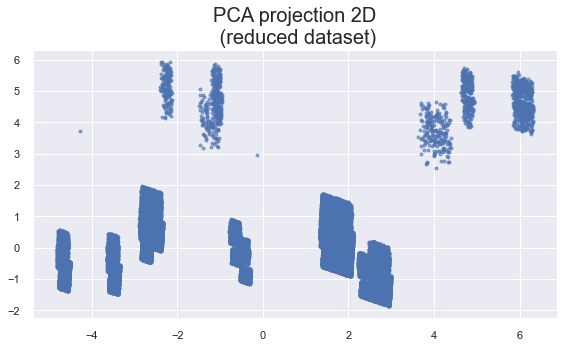

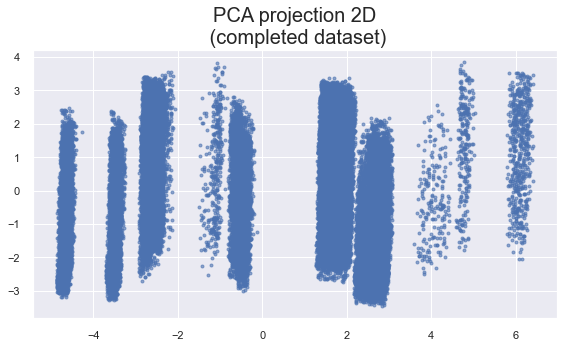

In [14]:
for key, value in DFs_REDUCED.items():
    plt.figure(figsize=(8,5))
    plt.title("PCA projection 2D\n (" + key + " dataset)", size=20)
    plt.scatter(value[:, 0], value[:, 1], alpha=0.6, marker='.')
    plt.tight_layout()
    plt.savefig("images/PCA-projection-2D-" + key + ".png")
    plt.show()
    

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>It seems that there are more defined clusters for all features in comparison with only RFM features</p>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.2. Correlation matrix</h4>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Correlation matrix</b>
</div>

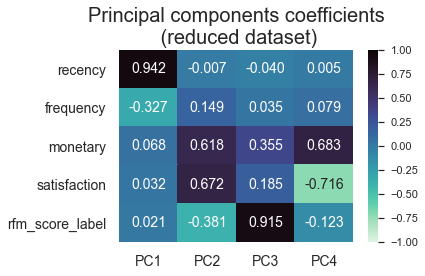

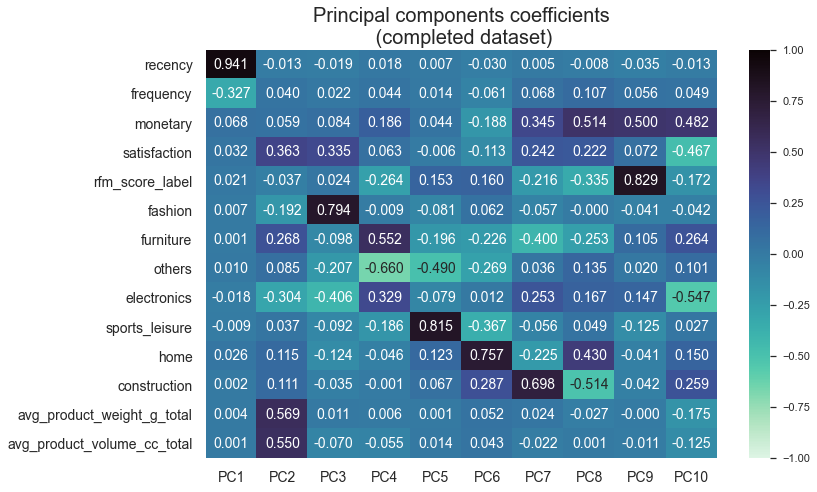

In [15]:
for key, value in DFs_PCA.items():
    
    if key == "reduced":
        plt.figure(figsize=(6,4))
    else:
        plt.figure(figsize=(12, 7))
        
    plt.title("Principal components coefficients\n (" + key + " dataset)", size=20)
    
    ax = sns.heatmap(globals()["df_pca_" + key], vmin=-1, vmax=1, center=0, cmap="mako_r",
                    annot=True, annot_kws={"size": 14}, fmt=".3f")

    plt.xticks(size=14)
    plt.yticks(rotation=0, size=14)
    plt.tight_layout()
    plt.savefig("images/principal-components-coefficients-" + key + ".png")
    plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: disc;">
        <li><b>Dataset reduced: </b>Recency and Frequency have a strong relation with PC1. At the same time, Monetary and Satisfaction has a  positive relation with PC2. RFM Score has a strong relation with PC3</li>
        <li><b>Dataset completed: </b>We can see how category are distributed among the differents components. Recency has a strong relation with PC1 and PC2 has a strong relation with the product weight and volume</li>
    </ul> 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.3. Scree of eigenvalues</h4>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Scree of eigenvalues</b>
</div>

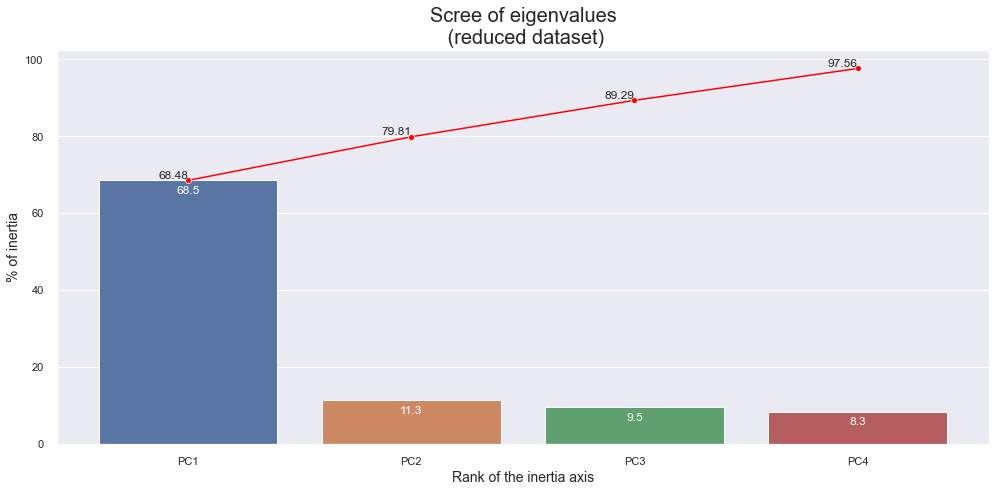

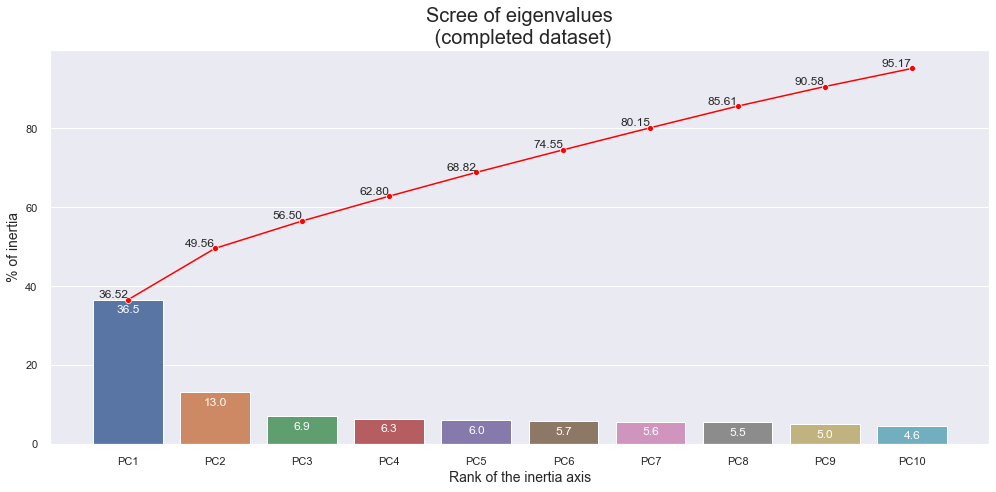

In [16]:
for key, value in DFs_PCA.items():
    
    scree = globals()["pca_" + key].explained_variance_ratio_*100

    fig = plt.subplots(figsize=(14, 7))
    plot_bar = sns.barplot(x=globals()["df_pca_" + key].columns, y=scree)
    for p in plot_bar.patches:
        plot_bar.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha="center", va="bottom", xytext=(0, -15), textcoords="offset points", color="white")
    plot_line = sns.lineplot(x=globals()["df_pca_" + key].columns, y=scree.cumsum(), marker="o", color="red")

    for x, y in zip(globals()["df_pca_" + key].columns, scree.cumsum()):
        plot_line.text(x, y, "{:.2f}".format(y), ha="right", va="bottom")

    plt.xlabel("Rank of the inertia axis", size=14)
    plt.ylabel("% of inertia", size=14)
    plt.title("Scree of eigenvalues\n (" + key + " dataset)", size=20)
    plt.tight_layout()
    plt.savefig("images/scree-of-eigenvalues-" + key + ".png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: disc;">
        <li><b>Dataset reduced: </b>PC3 has the 89.29% of the data variance.</li>
        <li><b>Dataset completed: </b>PC9 has the 90.58% of the data variance.</li>
    </ul> 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.4. Correlation Circle</h4>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Correlation Circle</b> for <b>dataset reduced</b>
</div>

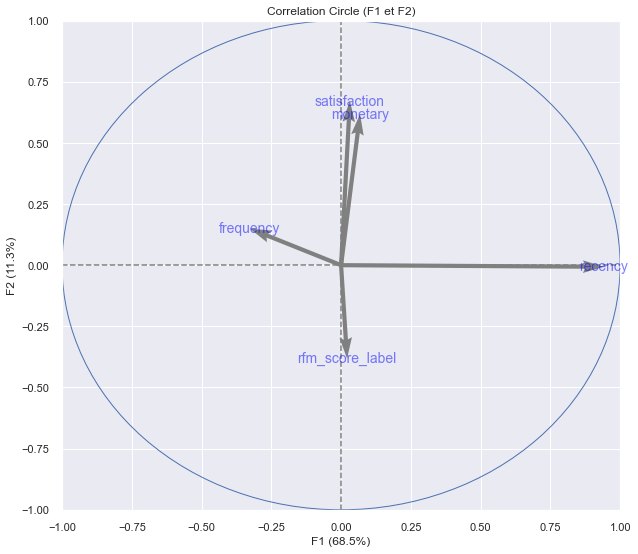

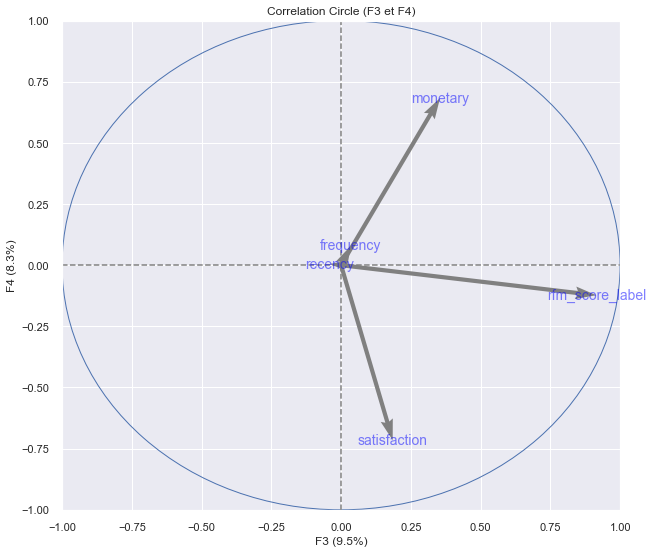

In [17]:
display_circles(pca_reduced.components_, n_comp_reduced, pca_reduced, [(0,1),(2,3),(4,5)], labels=np.array(features_reduced))

<div class="alert alert-block alert-info">
    Plotting the <b>Correlation Circle</b> for <b>dataset completed</b>
</div>

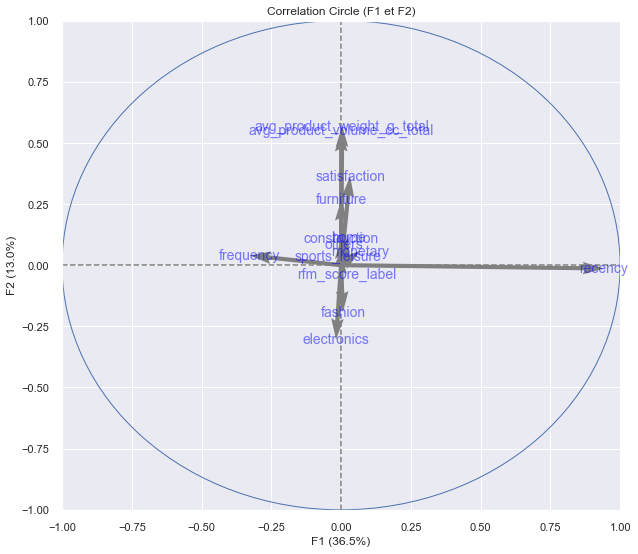

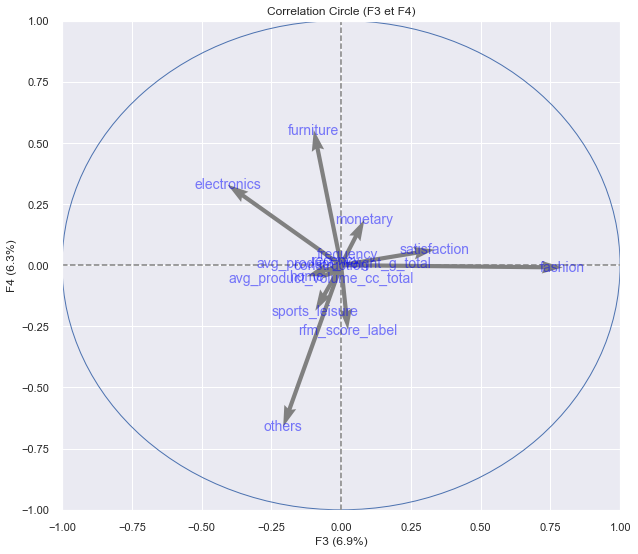

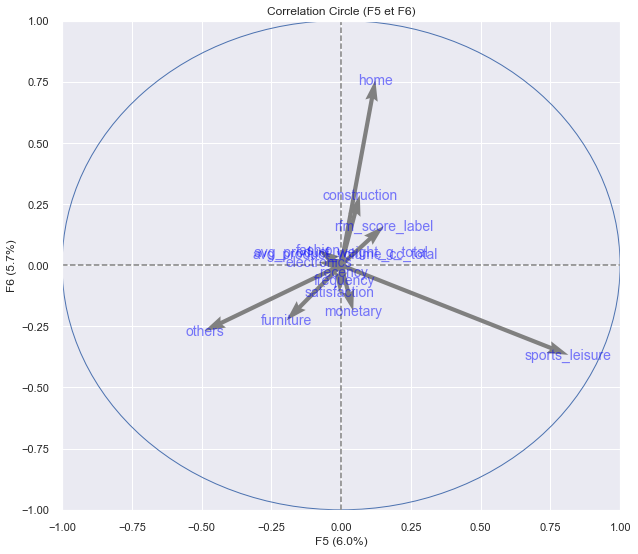

In [18]:
display_circles(pca_completed.components_, n_comp_completed, pca_completed, [(0,1),(2,3),(4,5)], labels=np.array(features_completed))

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.5. Projection of individuals</h4>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Projection of individuals</b>
</div>

In [19]:
for key, value in DFs_PCA.items():
    
    globals()["X_projected_" + key] = globals()["pca_" + key].transform(globals()["X_" + key])
    globals()["index_values_sample_" + key] = pd.Series(globals()["index_values_" + key]).sample(10000)

<div class="alert alert-block alert-info">
    Plotting the Projection of individuals for <b>dataset reduced</b></b>
</div>

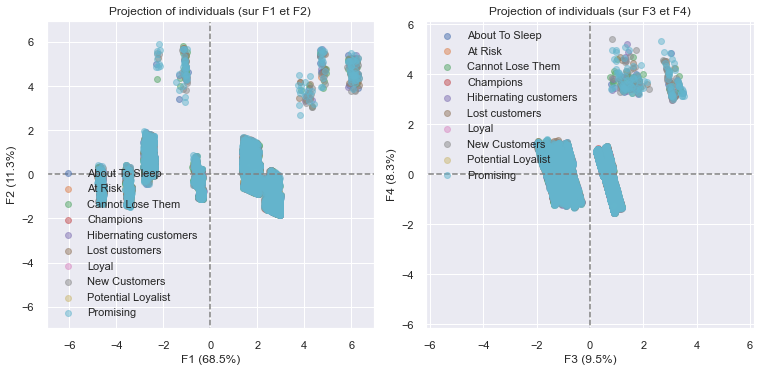

In [20]:
display_factorial_planes(X_projected_reduced, n_comp_reduced, pca_reduced, [(0,1),(2,3),(4,5)], 
                         labels=np.array(index_values_sample_reduced), 
                         illus_var=df_data.loc[index_values_sample_reduced, "rfm_score_label"], 
                         lab_on=False, alpha = 0.5)

<div class="alert alert-block alert-info">
    Plotting the Projection of individuals for <b>dataset completed</b></b>
</div>

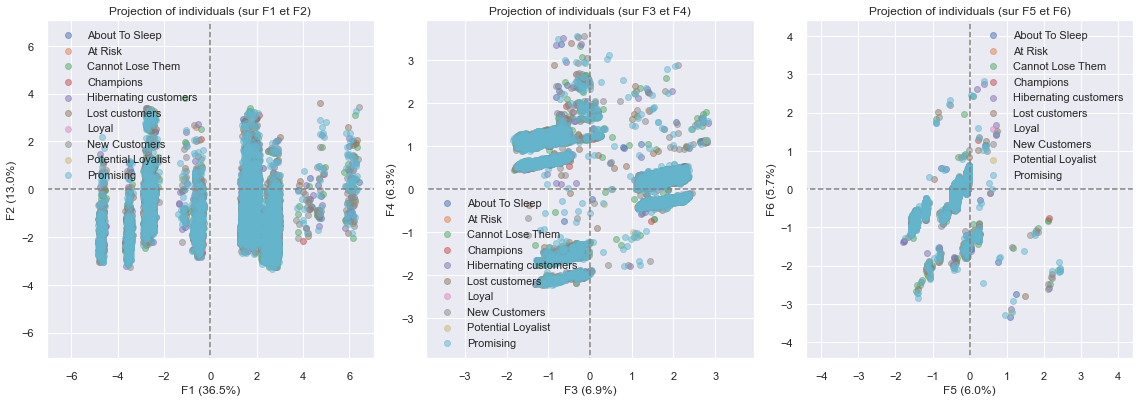

In [21]:
display_factorial_planes(X_projected_completed, n_comp_completed, pca_completed, [(0,1),(2,3),(4,5)], 
                         labels=np.array(index_values_sample_completed), 
                         illus_var=data_completed.loc[index_values_sample_completed, "rfm_score_label"], 
                         lab_on=False, alpha=0.5)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.6. Variance of the components</h4>
</div>

<div class="alert alert-block alert-info">
    Keeping the <b>90% of the variance of the components</b>
</div>

In [28]:
var_threshold=0.89
DFs_NUEVO = {}

for key, value in DFs_ORIGINAL.items():
    
    # Processing the PCA
    globals()["pca_" + key] = decomposition.PCA()
    globals()["pca_" + key].fit(globals()["X_" + key])
    
    # Getting the explained variance ratio for each principal component
    globals()["scree_" + key] = globals()["pca_" + key].explained_variance_ratio_
    
    # Getting the number of principal components to reach variance thresholds
    globals()["mask_" + key] = globals()["scree_" + key].cumsum() > var_threshold
    globals()["nb_selected_components_" + key] = len(globals()["scree_" + key][~globals()["mask_" + key]]) + 1
    
    # Compute and displays the actual ratio of explained variance
    globals()["explained_variance_sum_" + key] = globals()["scree_" + key].cumsum()[globals()["nb_selected_components_" + key]-1]

    # Getting the projection of the data on the first components
    globals()["X_PCA_" + key] = globals()["pca_" + key].transform(globals()["X_" + key])[:,:globals()["nb_selected_components_" + key]]

    
    COL_TO_PC =  ["PC" + str(i + 1) for i in range(globals()["nb_selected_components_" + key])]
    globals()["df_pca_" + key] = pd.DataFrame(data=globals()["X_PCA_" + key], columns=COL_TO_PC, index=globals()["index_values_" + key])
    
    DFs_NUEVO[key] = globals()["df_pca_" + key]
    
    print("-- Dataset " + key + " components --")
    print("Number of selected components:", globals()["nb_selected_components_" + key])
    print("Cumulative explained variance:  {:.2f}%".format(globals()["explained_variance_sum_" + key]*100))
    print("Shape: " + str(globals()["df_pca_" + key].shape))
    print("\n")


-- Dataset reduced components --
Number of selected components: 3
Cumulative explained variance:  89.29%
Shape: (66934, 3)


-- Dataset completed components --
Number of selected components: 9
Cumulative explained variance:  90.58%
Shape: (66934, 9)




<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. Datasets to works</h2>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to work with 4 datasets</p>
    <ul style="list-style-type: disc;">
        <li><b>reduced_data_pca_completed: </b>All features transformed</li>
        <li><b>reduced_data_pca_reduced: </b>only 3 feautures (RFM) transformed</li>
        <li><b>df_pca_completed: </b>PCA all features</li>
        <li><b>df_pca_reduced: </b>PCA only 3 features (RFM) transformed</li>
    </ul> 
</div>

In [23]:
DFs_REDUCED.keys()

dict_keys(['reduced', 'completed'])

In [24]:
DFs_PCA.keys()

dict_keys(['reduced', 'completed'])

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">5. K-Means</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.1. Number of Cluster</h3>
</div>

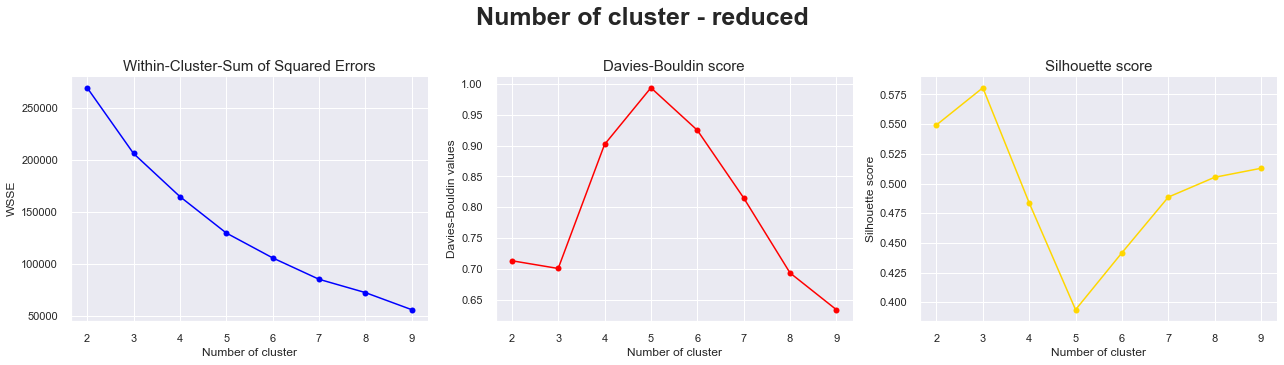

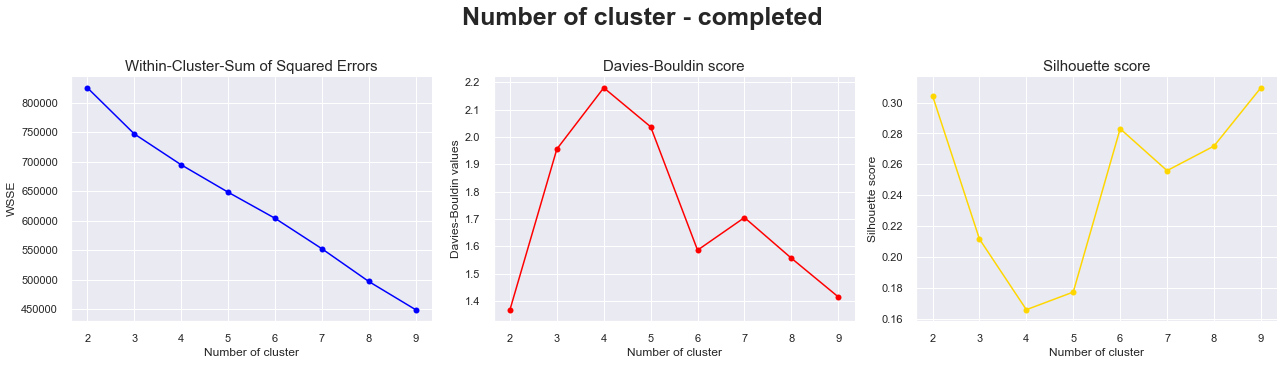

In [25]:
for key, value in DFs_REDUCED.items():
    number_of_cluster(value, key)

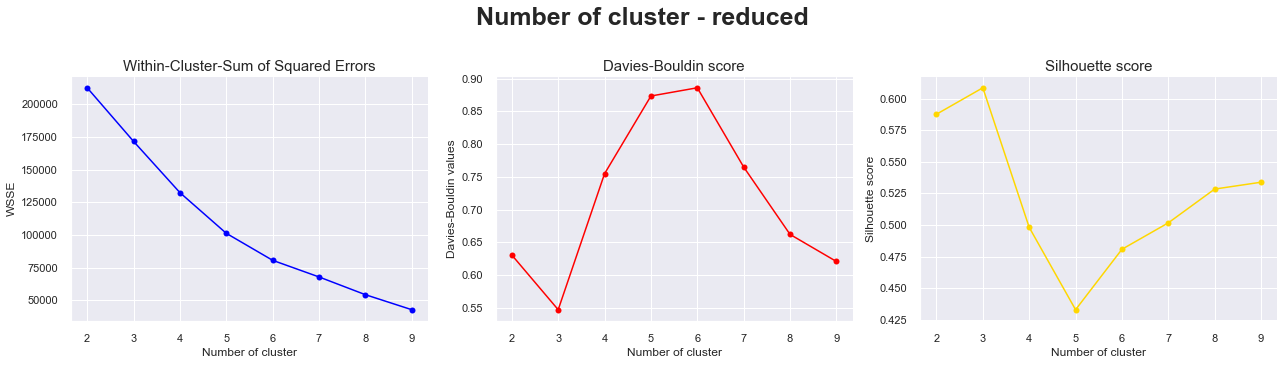

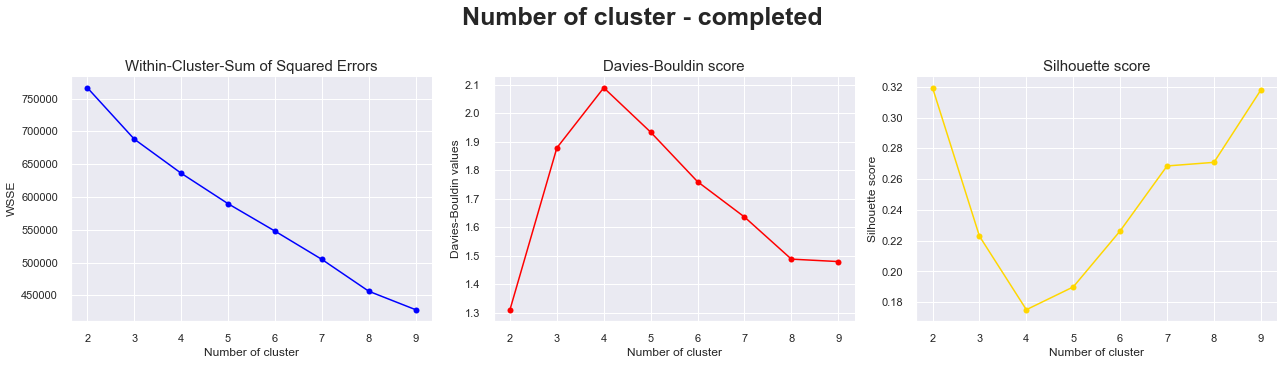

In [29]:
for key, value in DFs_NUEVO.items():
    number_of_cluster(value, key)

In [ ]:
XXXXX

In [27]:
for key, value in DFs_PCA.items():
    print(value.shape)

(5, 4)
(14, 10)


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
WSSE, davies_bouldin, silhouette = ({} for i in range(3))

for key, value in DFS_TO_WORK.items():
    
    print(key)
    
    for i in range(2, 10):
        
        # seed of 10 for reproducibility.
        kmeans = KMeans(init='k-means++', n_clusters=i, max_iter=1000, random_state=10).fit(value)
        
        clusters = kmeans.labels_
        WSSE[i] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
        davies_bouldin[i] = davies_bouldin_score(value, clusters)
        silhouette[i] = silhouette_score(value, clusters)

In [ ]:
# Graphiques pour chaque métriques

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25, 5))

ax1.plot(list(WSSE.keys()), list(WSSE.values()), color="blue", marker='o')
ax1.set_xlabel("Number of cluster")
ax1.set_ylabel("WSSE")

ax2.plot(list(davies_bouldin.keys()), list(davies_bouldin.values()), color="red", marker='o')
ax2.set_xlabel("Number of cluster")
ax2.set_ylabel("Davies-Bouldin values")

ax3.plot(list(silhouette.keys()), list(silhouette.values()), color="gold", marker='o')
ax3.set_xlabel("Number of cluster")
ax3.set_ylabel("Silhouette score")

<div class="alert alert-block alert-info">
    Now, we are going to select the number of cluster through the <b>Elbow Method</b>
</div>

In [ ]:
model = KMeans()

for key, value in DFS_TO_WORK.items():
    
    visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
    
    print("\n-- " + key + " --\n")
    
    visualizer.fit(value)
    visualizer.show()
    
    print("\n")

In [ ]:

# Fitting KMeans
km = KMeans(n_clusters=7, random_state=42)

# Prediction
label = km.fit_predict(data_pca_completed)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(data_pca_completed[label==i, 0], data_pca_completed[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [ ]:

# Fitting KMeans
km = KMeans(n_clusters=7, random_state=42)

# Prediction
label = km.fit_predict(data_pca_reduced)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(data_pca_reduced[label==i, 0], data_pca_reduced[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [ ]:

# Fitting KMeans
km = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km.fit_predict(data_sample_scaled_reduced)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(data_sample_scaled_reduced[label==i, 0], data_sample_scaled_reduced[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [ ]:

# Fitting KMeans
km = KMeans(n_clusters=7, random_state=42)

# Prediction
label = km.fit_predict(data_sample_scaled_completed)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(data_sample_scaled_completed[label==i, 0], data_sample_scaled_completed[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [ ]:
CCCCC

In [ ]:
DICTIONARY_DFS = {
    "reduced" : data_reduced,
    "completed" : data_completed    
}

In [ ]:
sample_scaled_reduced

In [ ]:
sample_scaled_completed

In [ ]:
example = globals()["sample_scaled_" + key] = preprocessor.fit_transform(value)

In [ ]:
data_reduced

In [ ]:
example = preprocessor.fit_transform(data_reduced)

In [ ]:
data_reduced

In [ ]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=K)
    km = km.fit(df_pca_reduced.values)
    sum_of_squared_distances.append(km.inertia_)

In [ ]:
df_pca_completed

In [ ]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(df_pca_completed.values).score(df_pca_completed.values) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
model = KMeans()

    
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(sample_scaled_completed)
visualizer.show()


In [ ]:
model = KMeans()

    
visualizer = KElbowVisualizer(model, k=(2, 50), timings=False)
visualizer.fit(sample_scaled_reduced)
visualizer.show()


<div class="alert alert-block alert-info">
    Now, we are going to select the number of cluster through the <b>Elbow Method</b>
</div>

In [ ]:
model = KMeans()

for key, value in DICTIONARY_DFS.items():
    
    visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
    
    if ("pca") in key:
        print("\n-- " + key + " --\n")
        visualizer.fit(globals()["df_" + key])
    else:
        print("\n-- " + key + " --\n")
        visualizer.fit(globals()["df_pca_" + key])
        
    visualizer.show()
    
    print("\n")

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Now, we got the cluster for each dataset</p>
</div>

In [ ]:
# Fitting KMeans
km = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km.fit_predict(df_pca_reduced.value)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df_pca_reduced[label==i, 0], df_pca_reduced[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [ ]:
# Fitting KMeans
km = KMeans(init='random', n_clusters=5, random_state=42,  n_init=10)

In [ ]:
km.fit(df_pca_reduced)
clusters = km.predict(df_pca_reduced)

In [ ]:
pca_reduced = PCA(n_components=3)
pca_reduced.fit(df_pca_reduced)

In [ ]:
X_reduced = pca_reduced.transform(df_pca_reduced)

In [ ]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=df_pca_reduced.index, columns=['PC1','PC2', "PC3"])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

In [ ]:
centres_reduced = pca_reduced.transform(km.cluster_centers_)

In [ ]:
display_factorial_planesXXX(X_reduced, 2, pca_reduced, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

In [ ]:
def display_factorial_planesXXX(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

In [ ]:
data_reduced.index

In [ ]:
# Fitting KMeans
km = KMeans(n_clusters=5, random_state=42)

# Prediction
label = km.fit_predict(df_pca_reduced)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df_pca_reduced.iloc[label==i, 0], df_pca_reduced.iloc[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [ ]:
# Fitting KMeans
km = KMeans(n_clusters=6, random_state=42)

# Prediction
label = km.fit_predict(df_pca_completed)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df_pca_completed.iloc[label==i, 0], df_pca_completed.iloc[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

In [ ]:
raise SystemExit("Stop right there!")

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

In [ ]:
df 

In [ ]:
df_log = pd.DataFrame({
    "column1":["A", "A", "A", "A", "A", "A", "A"],
    "column2":["B", "B", "B", "B", "B", "B", "B"],
    "column3":[5, 2, 10, 1, 1, 1, 1],
    "column4":[4234, 432, 123, 123, 124, 125, 126],
    "column5":[123, 3243, 43, 45, 23243, 234, 23]
})

In [ ]:
df_log

In [ ]:
df_log["log2"] = np.log2(df_log["column5"] + 1)

In [ ]:
df_log

In [ ]:
df_log["log2-inverse"] = 2 ** df_log["log2"] - 1
df_log

In [ ]:
CCCCCCCCCCCC

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(df_worked)
visualizer.show()

In [ ]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(df_worked).score(df_worked) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

In [ ]:
raise SystemExit("Stop right there!")

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div class="alert alert-block alert-info">
    First of all, we are going to work on deafult mode for the model
</div>

In [ ]:
model = KMeans(init="random", n_clusters="4", n_init=10)

In [ ]:
label  = model.fit_predict(df_data_PCA)

In [ ]:
# centroids = model.cluster_centers_
u_labels = np.unique(label)

In [ ]:
# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df_data_PCA.iloc[label==i, 0], df_data_PCA.iloc[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. K-means</h3>
</div>

<div class="alert alert-block alert-info">
    First of all, we are going to work on deafult mode for the model
</div>

In [ ]:
https://www.scikit-yb.org/en/latest/

https://www.youtube.com/watch?v=4b5d3muPQmA
- forma
    -- centroide??
        -- homogeneidad
        -- Separacion de cluster -- SKL=
         union --> index davies bouldin
         silhouette -> escoger la cantidad de cluster y ver la estabilidad
- estabilidad
- coherencia


- ARI, pour Adjusted Rand Index

https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
https://www.youtube.com/watch?v=EItlUEPCIzM
https://datascientest.com/algorithme-des-k-means.
https://realpython.com/k-means-clustering-python/

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

In [ ]:
raise SystemExit("Stop right there!")

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Optimization</h3>
</div>

<div class="alert alert-block alert-info">
    List of models to use. for now, in default mode
</div>

- Clustering hiérarchique
- k-means
- DBScan

https://www.definitions-marketing.com/definition/segmentation-rfm/<br>
https://lms.simplilearn.com/courses/4414/Introduction-to-Supervised-&-Unsupervised-Machine-Learning/syllabus<br>

https://classroom.udacity.com/courses/st101<br>
https://classroom.udacity.com/courses/ud827<br>
https://www.freecodecamp.org/news/free-machine-learning-course-10-hourse/<br>

https://towardsdatascience.com/10-highly-probable-data-scientist-interview-questions-fd83f7414760<br>